# British Airways Summer Flight Data Analysis
## Description: This script analyzes British Airways' summer flight schedule.



### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

### Set plot style

In [8]:

sns.set(style = 'whitegrid')

### Load the Excel File

In [9]:
file_path = r"C:\Users\meghn\OneDrive\Desktop\jupyter\British Airways Summer Schedule Dataset.xlsx"
xls = pd.ExcelFile(file_path)
df = xls.parse("british_airways_schedule_summer")
df.head()


,FLIGHT_DATE,FLIGHT_TIME,TIME_OF_DAY,AIRLINE_CD,FLIGHT_NO,DEPARTURE_STATION_CD,ARRIVAL_STATION_CD,ARRIVAL_COUNTRY,ARRIVAL_REGION,HAUL,AIRCRAFT_TYPE,FIRST_CLASS_SEATS,BUSINESS_CLASS_SEATS,ECONOMY_SEATS,TIER1_ELIGIBLE_PAX,TIER2_ELIGIBLE_PAX,TIER3_ELIGIBLE_PAX
0,2025-09-02,14:19:00,Afternoon,BA,BA5211,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,10,38
1,2025-06-10,06:42:00,Morning,BA,BA7282,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,7,28
2,2025-10-27,15:33:00,Afternoon,BA,BA1896,LHR,FRA,Germany,Europe,SHORT,A320,0,17,163,0,11,40
3,2025-06-15,18:29:00,Evening,BA,BA5497,LHR,IST,Turkey,Europe,SHORT,A320,0,8,172,0,16,54
4,2025-08-25,20:35:00,Evening,BA,BA1493,LHR,FRA,Germany,Europe,SHORT,A320,0,13,167,0,6,27


### Data Processing

In [10]:
# Convert flight date column to date time
df['FLIGHT_DATE'] = pd.to_datetime(df['FLIGHT_DATE'])

# Extract month name and number
df['MONTH'] = df['FLIGHT_DATE'].dt.strftime('%B')
df['MONTH_NUM'] = df['FLIGHT_DATE'].dt.month

# Sort months in calendar order
month_order = df.sort_values('MONTH_NUM')['MONTH'].unique()

## 1. Flight Haul Type Distribution

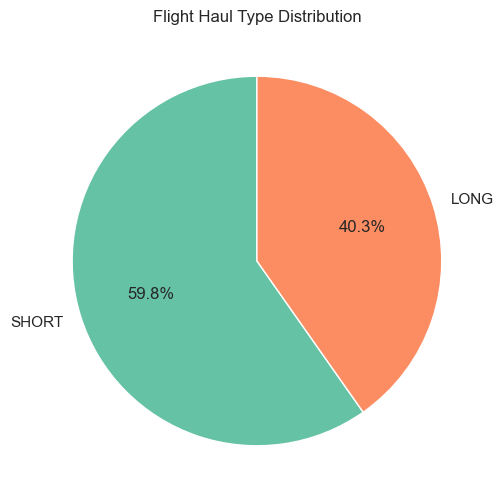

In [11]:
df['HAUL'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', startangle=90,
    colors=['#66c2a5', '#fc8d62'], figsize=(6,6)
)
plt.title("Flight Haul Type Distribution")
plt.ylabel("")
plt.show()

## 2. Top 10 Arrival Countries

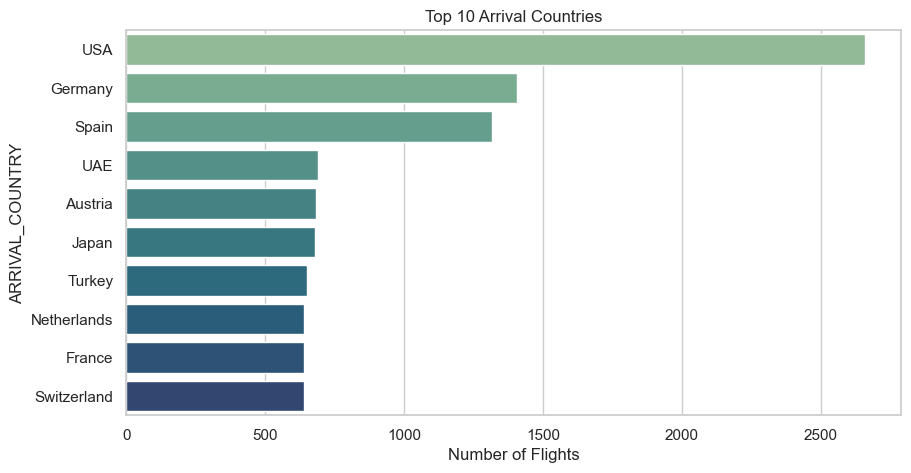

In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

top_countries = df['ARRIVAL_COUNTRY'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="crest")
plt.title("Top 10 Arrival Countries")
plt.xlabel("Number of Flights")
plt.show()


## 3. Aircraft Usage Frequency

<Figure size 800x500 with 0 Axes>

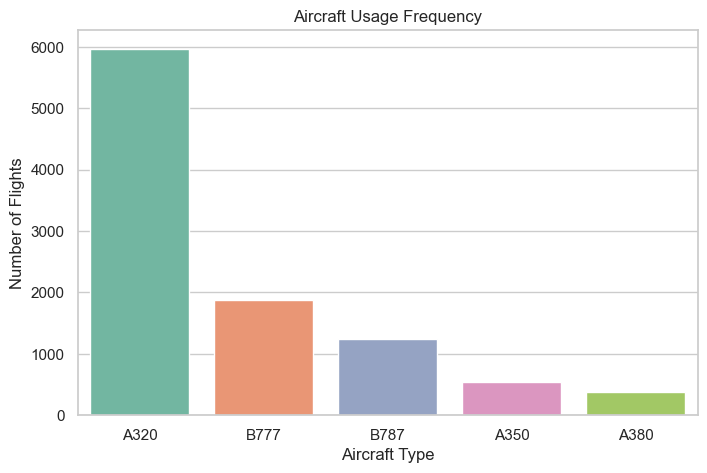

In [26]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

aircraft_counts = df['AIRCRAFT_TYPE'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=aircraft_counts.index, y=aircraft_counts.values, palette="Set2")
plt.title("Aircraft Usage Frequency")
plt.ylabel("Number of Flights")
plt.xlabel("Aircraft Type")
plt.show()



## 4. Flights by Time Of Day

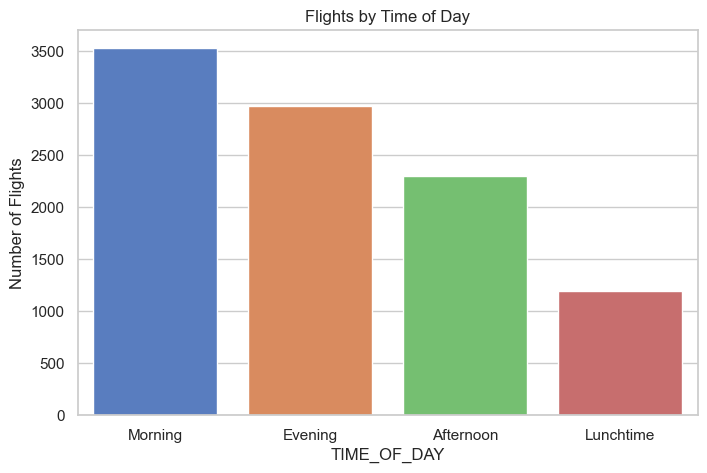

In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

time_counts = df['TIME_OF_DAY'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=time_counts.index, y=time_counts.values, palette="muted", legend=False) 
plt.title("Flights by Time of Day")
plt.ylabel("Number of Flights")
plt.show()

## 5. Monthly Flights Distribution(Flight Volume)

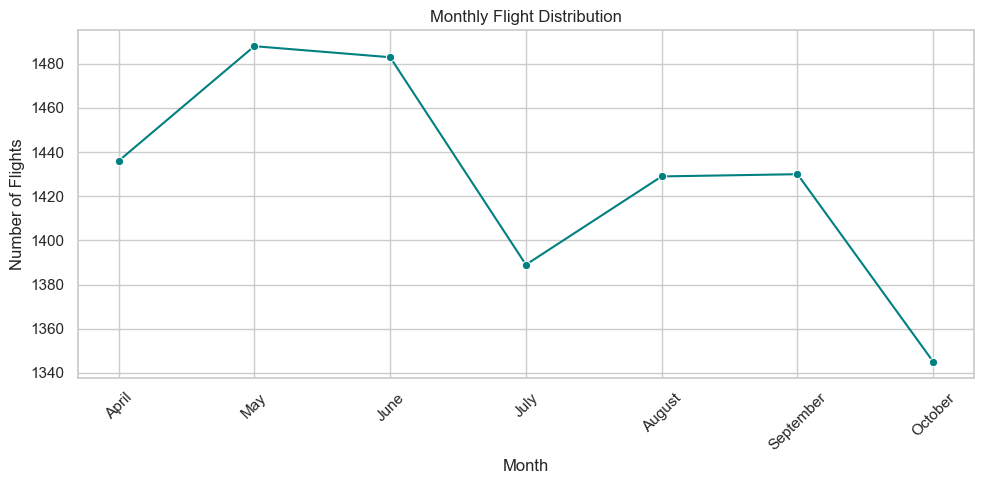

In [51]:
# Group by MONTH and count flights
monthly_flights = df.groupby(['MONTH_NUM', 'MONTH']).size().reset_index(name='Flight Count')

# Sort by month number for correct order
monthly_flights = monthly_flights.sort_values('MONTH_NUM')

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_flights, x='MONTH', y='Flight Count', marker='o', color='teal')
plt.title("Monthly Flight Distribution")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 6. A) Top Arrival Regions by Flight Count

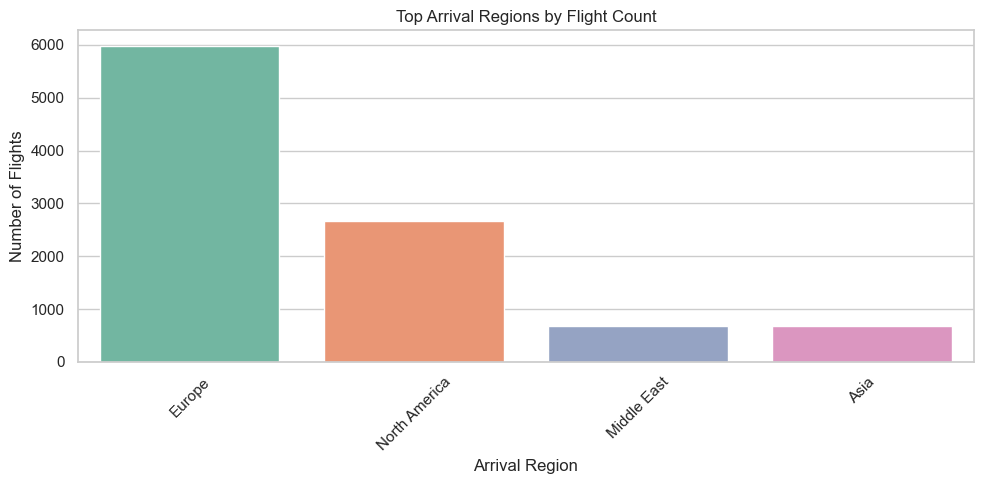

In [38]:
# Count flights by arrival region
region_counts = df['ARRIVAL_REGION'].value_counts()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='Set2')
plt.title("Top Arrival Regions by Flight Count")
plt.xlabel("Arrival Region")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. B) Haul Type Distribution By Region

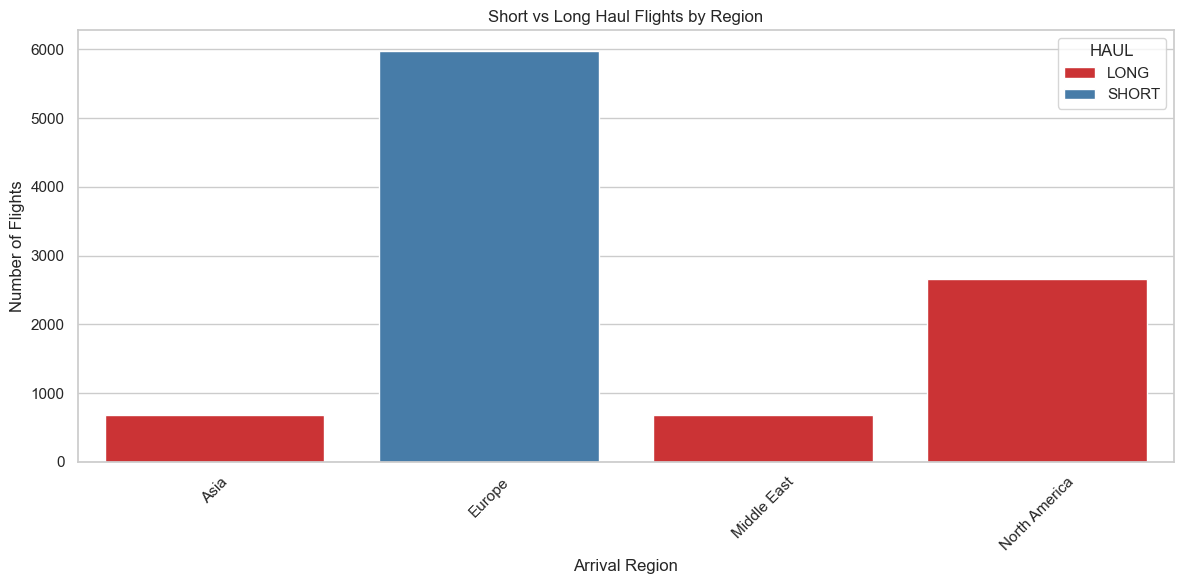

In [39]:
# Group by ARRIVAL_REGION and HAUL
region_haul = df.groupby(['ARRIVAL_REGION', 'HAUL']).size().reset_index(name='Flight Count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=region_haul, x='ARRIVAL_REGION', y='Flight Count', hue='HAUL', palette='Set1')
plt.title("Short vs Long Haul Flights by Region")
plt.xlabel("Arrival Region")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. C) Region-Wise Average Business Class Seats

Available columns: ['FLIGHT_DATE', 'FLIGHT_TIME', 'TIME_OF_DAY', 'AIRLINE_CD', 'FLIGHT_NO', 'DEPARTURE_STATION_CD', 'ARRIVAL_STATION_CD', 'ARRIVAL_COUNTRY', 'ARRIVAL_REGION', 'HAUL', 'AIRCRAFT_TYPE', 'FIRST_CLASS_SEATS', 'BUSINESS_CLASS_SEATS', 'ECONOMY_SEATS', 'TIER1_ELIGIBLE_PAX', 'TIER2_ELIGIBLE_PAX', 'TIER3_ELIGIBLE_PAX', 'MONTH', 'MONTH_NUM', 'total_passengers', 'total_seats', 'overcrowding_ratio']


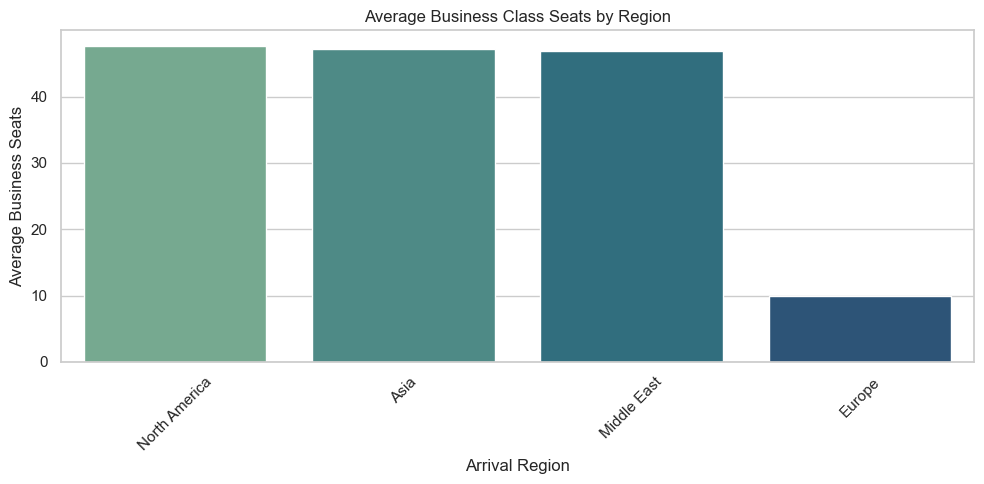

In [64]:
# Group and calculate average business seats by region



print("Available columns:", df.columns.tolist())


region_seats = df.groupby('ARRIVAL_REGION')['BUSINESS_CLASS_SEATS'].mean().round(1).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=region_seats.index, y=region_seats.values, palette='crest')
plt.title("Average Business Class Seats by Region")
plt.xlabel("Arrival Region")
plt.ylabel("Average Business Seats")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Eligible Passenger by Tier(1,2,3)

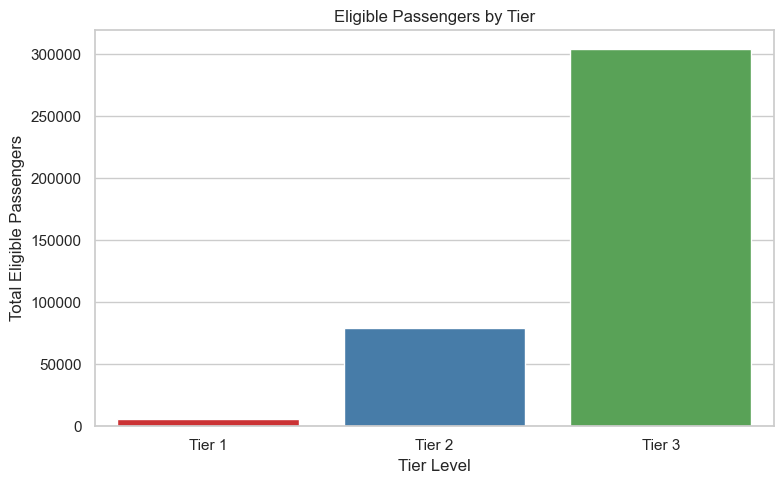

In [44]:
# Sum up each tier column
tier_totals = {
    "Tier 1": df['TIER1_ELIGIBLE_PAX'].sum(),
    "Tier 2": df['TIER2_ELIGIBLE_PAX'].sum(),
    "Tier 3": df['TIER3_ELIGIBLE_PAX'].sum()
}

# Convert to dataframe for plotting
tier_df = pd.DataFrame(list(tier_totals.items()), columns=['Tier', 'Eligible Passengers'])

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=tier_df, x='Tier', y='Eligible Passengers', palette='Set1')
plt.title("Eligible Passengers by Tier")
plt.xlabel("Tier Level")
plt.ylabel("Total Eligible Passengers")
plt.tight_layout()
plt.show()

## 8. Top Countries by Business Class Seat Allocation

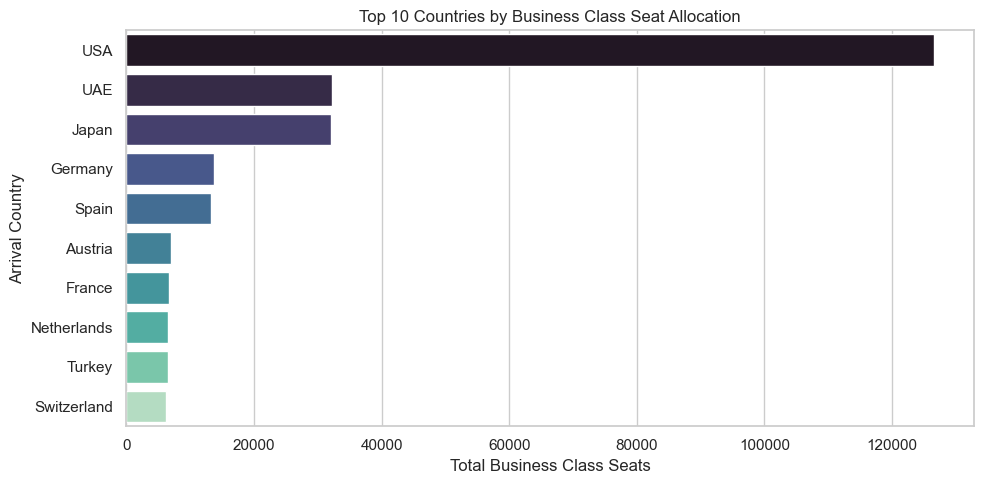

In [46]:
# Group by ARRIVAL_COUNTRY and sum business class seats
country_business = df.groupby('ARRIVAL_COUNTRY')['BUSINESS_CLASS_SEATS'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=country_business.values, y=country_business.index, palette='mako')
plt.title("Top 10 Countries by Business Class Seat Allocation")
plt.xlabel("Total Business Class Seats")
plt.ylabel("Arrival Country")
plt.tight_layout()
plt.show()

## 9. Haul Type vs Seat Allocation

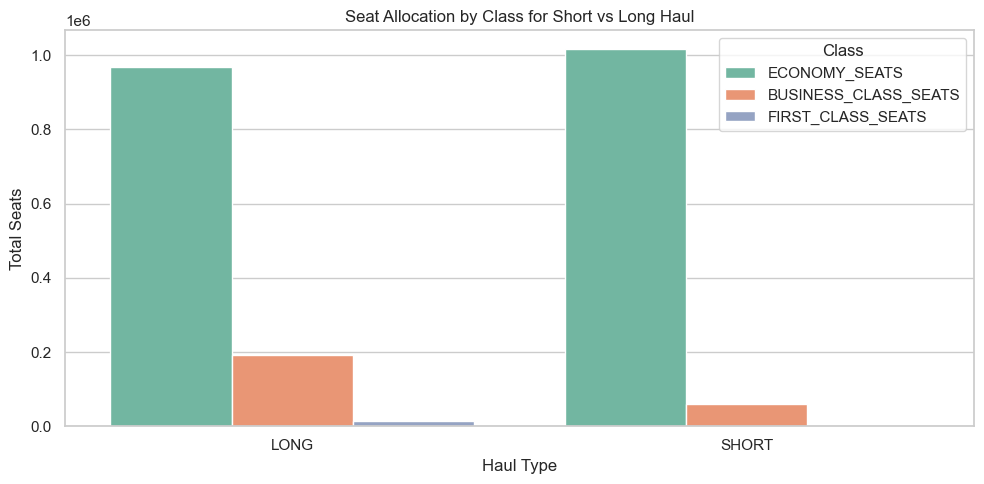

In [61]:
# Group by HAUL and sum seats
haul_seats = df.groupby('HAUL')[['ECONOMY_SEATS', 'BUSINESS_CLASS_SEATS', 'FIRST_CLASS_SEATS']].sum().reset_index()

# Melt for plotting
haul_seats_melted = pd.melt(haul_seats, id_vars='HAUL',
                            value_vars=['ECONOMY_SEATS', 'BUSINESS_CLASS_SEATS', 'FIRST_CLASS_SEATS'],
                            var_name='Class', value_name='Total Seats')

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=haul_seats_melted, x='HAUL', y='Total Seats', hue='Class', palette='Set2')
plt.title("Seat Allocation by Class for Short vs Long Haul")
plt.xlabel("Haul Type")
plt.ylabel("Total Seats")
plt.tight_layout()
plt.show()

## 10. Most Overcrowded Flight

In [65]:
# Calculate total passengers per flight (all tiers)
df['total_passengers'] = (
    df['TIER1_ELIGIBLE_PAX'].fillna(0) +
    df['TIER2_ELIGIBLE_PAX'].fillna(0) +
    df['TIER3_ELIGIBLE_PAX'].fillna(0)
)

# Calculate total seats available per flight
df['total_seats'] = (
    df['ECONOMY_SEATS'].fillna(0) +
    df['BUSINESS_CLASS_SEATS'].fillna(0) +
    df['FIRST_CLASS_SEATS'].fillna(0)
)


df['overcrowding_ratio'] = (df['total_passengers'] / df['total_seats']).round(2)

#  Filter valid rows and got top 10 overcrowded flights
top_overcrowded = df[df['total_seats'] > 0].sort_values(by='overcrowding_ratio', ascending=False).head(10)

#check columns are available
print("Available columns:", df.columns.tolist())

top_overcrowded[['total_passengers', 'total_seats', 'overcrowding_ratio']]



Available columns: ['FLIGHT_DATE', 'FLIGHT_TIME', 'TIME_OF_DAY', 'AIRLINE_CD', 'FLIGHT_NO', 'DEPARTURE_STATION_CD', 'ARRIVAL_STATION_CD', 'ARRIVAL_COUNTRY', 'ARRIVAL_REGION', 'HAUL', 'AIRCRAFT_TYPE', 'FIRST_CLASS_SEATS', 'BUSINESS_CLASS_SEATS', 'ECONOMY_SEATS', 'TIER1_ELIGIBLE_PAX', 'TIER2_ELIGIBLE_PAX', 'TIER3_ELIGIBLE_PAX', 'MONTH', 'MONTH_NUM', 'total_passengers', 'total_seats', 'overcrowding_ratio']


,total_passengers,total_seats,overcrowding_ratio
209,120,180,0.67
6891,112,180,0.62
8248,110,180,0.61
1615,106,180,0.59
4997,104,180,0.58
5796,104,180,0.58
1957,104,180,0.58
2305,104,180,0.58
3982,104,180,0.58
7223,104,180,0.58
